## Rascunho do Projeto Módulo 01
Esse rascunho irá servir como apoio para a construção do Projeto Módulo 01

In [1]:
#importação das bibliotecas utilizadas no decorrer do notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [2]:
#Lendo o arquivo "../datasets/AIH_aprovadas.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido a ultima linha com o skipfooter para remover o total já calculado
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_aih_aprovadas = pd.read_csv("../datasets/AIH_aprovadas.csv", sep=";", 
                   encoding="ISO-8859-1",
                   usecols = [i for i in range(287) if (i == 0 or i > 127 and i < 283)],
                   skipfooter=1, engine='python')
#setando o index como "Unidade da Federação"
df_aih_aprovadas = df_aih_aprovadas.set_index("Unidade da Federação")

In [3]:
#Lendo o arquivo "../datasets/A111057189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#Com o "decimal" deliminamos as casas decimais do dataset
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_media_permanencia = pd.read_csv("../datasets/A111057189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",decimal=",",
                   usecols = [i for i in range(172) if (i == 0 or i > 13 and i < 169)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_media_permanencia = df_media_permanencia.set_index("Unidade da Federação")

In [4]:
#Lendo o arquivo "../datasets/A111605189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#com o "thousands" delimitamos a separação dos milhares
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_obitos = pd.read_csv("../datasets/A111605189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",thousands=".",
                   usecols = [i for i in range(180) if (i == 0 or i > 21 and i < 177)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_obitos = df_obitos.set_index("Unidade da Federação")

In [5]:
coluna_regiao=[] #criando uma lista para registrar os valores das regiões em relação aos estados
coluna_estado=[] #criando uma lista para registrar os valores dos estados sem o identificador número que contém no indíce

regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'] #criando uma lista com as regiões pré-definidas

for linha in df_aih_aprovadas.iterrows(): #aqui iniciamos um loop for que vai percorrer todas as linhas do "df_aih_aprovadas" 
                                        #para pegar a "Unidade da Federação"(os valores dos estados) e fazer as validações
                                        #porém aqui a gente podia usar qualquer um dos dataframes, dado que todos estão ordenados pela Unidade da Federação
    
    estado=linha[0] #criamos uma variável "estado" para pegar o valor de cada estado, que é o indice 0 de cada linha
    id_regiao = int(estado.split(' ')[0]) #aqui pegamos o identificador da região, que no caso são os numeros antes do nome do estado
    estado_sem_id = estado.split(' ', maxsplit = 1)[1] #aqui pegamos apenas o nome do estado
    
    coluna_estado.append(estado_sem_id) #adicionando os estados à lista coluna_estado
    
    #aqui verificamos cada id e adicionamos à coluna_regiao o valor referente da região do estado
    if id_regiao < 20:
        coluna_regiao.append(regioes[0])
    elif id_regiao < 30:
        coluna_regiao.append(regioes[1])
    elif id_regiao < 40:
        coluna_regiao.append(regioes[2])
    elif id_regiao < 50:
        coluna_regiao.append(regioes[3])
    else:
        coluna_regiao.append(regioes[4])
        
#adicionamos os valores de coluna_regiao para cada dataframe
df_aih_aprovadas["Região"] = coluna_regiao
df_media_permanencia["Região"] = coluna_regiao
df_obitos["Região"] = coluna_regiao

#adicionamos os valores da coluna_estado para cada dataframe
df_aih_aprovadas["Estado"] = coluna_estado
df_media_permanencia["Estado"] = coluna_estado
df_obitos["Estado"] = coluna_estado


<AxesSubplot:xlabel='Unidade da Federação'>

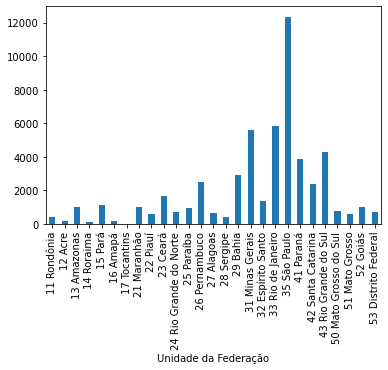

In [6]:
df_obitos["2020/Dez"].plot(kind='bar')

<AxesSubplot:xlabel='Região'>

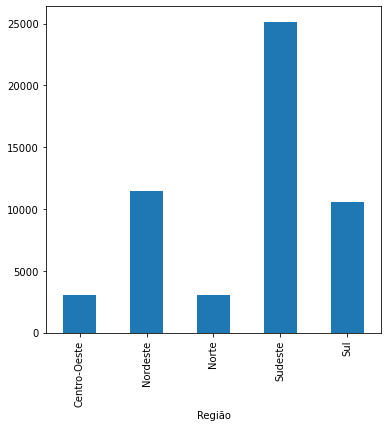

In [7]:
df_obitos.groupby(by=["Região"])["2020/Dez"].sum().plot(kind="bar",figsize=(6,6))

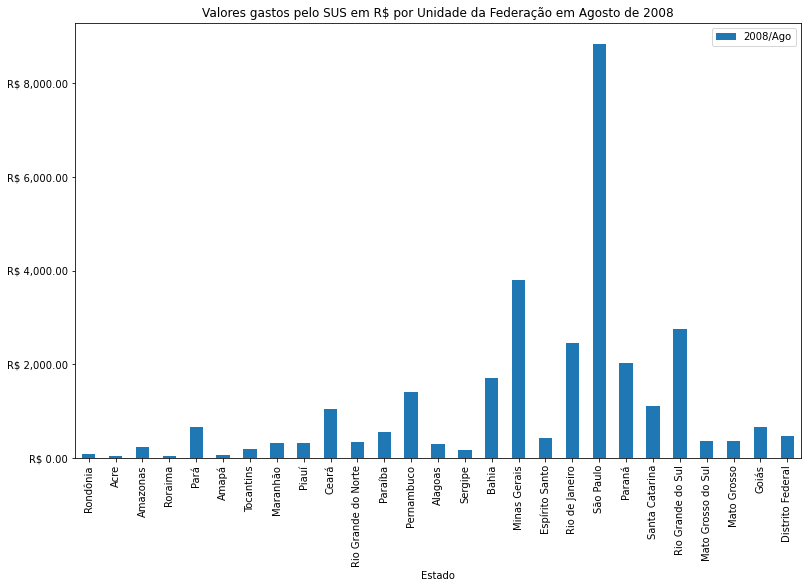

In [8]:
ax = df_obitos.plot(x="Estado",y="2008/Ago",kind="bar",figsize=(13,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()